In [3]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [4]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func, distinct

In [6]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [11]:
# Create the SQLAlchemy inspector and connect it to the engine
inspector = inspect(engine)

In [12]:
# Use reflection to get the Measurement table details
columns = inspector.get_columns('Measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [13]:
# Use reflection to get the Station table details
columns = inspector.get_columns('Station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Precipitation Analysis

In [14]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0]
print(recent_date)

2017-08-23


In [15]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.

one_year_data = session.query(Measurement.date, Measurement.prcp)\
    .filter(Measurement.date > '2016-08-22')\
    .filter(Measurement.date <= '2017-08-23')\
    .order_by(Measurement.date).all()

# Perform a query to retrieve the data and precipitation scores
print(one_year_data)

[('2016-08-23', 0.0), ('2016-08-23', 0.15), ('2016-08-23', 0.05), ('2016-08-23', None), ('2016-08-23', 0.02), ('2016-08-23', 1.79), ('2016-08-23', 0.7), ('2016-08-24', 0.08), ('2016-08-24', 2.15), ('2016-08-24', 2.28), ('2016-08-24', None), ('2016-08-24', 1.22), ('2016-08-24', 2.15), ('2016-08-24', 1.45), ('2016-08-25', 0.08), ('2016-08-25', 0.08), ('2016-08-25', 0.0), ('2016-08-25', 0.0), ('2016-08-25', 0.21), ('2016-08-25', 0.06), ('2016-08-25', 0.11), ('2016-08-26', 0.0), ('2016-08-26', 0.03), ('2016-08-26', 0.02), ('2016-08-26', 0.04), ('2016-08-26', 0.0), ('2016-08-26', 0.01), ('2016-08-27', 0.0), ('2016-08-27', 0.18), ('2016-08-27', 0.02), ('2016-08-27', 0.0), ('2016-08-27', 0.12), ('2016-08-27', None), ('2016-08-28', 0.01), ('2016-08-28', 0.14), ('2016-08-28', 0.14), ('2016-08-28', 0.14), ('2016-08-28', 0.6), ('2016-08-28', 2.07), ('2016-08-29', 0.0), ('2016-08-29', 0.17), ('2016-08-29', 0.04), ('2016-08-29', None), ('2016-08-29', 0.0), ('2016-08-29', 0.35), ('2016-08-29', 0.9),

In [16]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(one_year_data, columns = ["Measurement Date", "Precipitation"])
df.set_index("Measurement Date", inplace=True)
df

Precipitation
Measurement Date               
2016-08-23                 0.00
2016-08-23                 0.15
2016-08-23                 0.05
2016-08-23                  NaN
2016-08-23                 0.02
...                         ...
2017-08-22                 0.50
2017-08-23                 0.00
2017-08-23                 0.00
2017-08-23                 0.08
2017-08-23                 0.45

[2230 rows x 1 columns]

In [17]:
# Sort the dataframe by date
df.sort_index(inplace=True)
df.head(10)

Precipitation
Measurement Date               
2016-08-23                 0.00
2016-08-23                 0.15
2016-08-23                 0.05
2016-08-23                  NaN
2016-08-23                 0.02
2016-08-23                 1.79
2016-08-23                 0.70
2016-08-24                 0.08
2016-08-24                 2.15
2016-08-24                 2.28

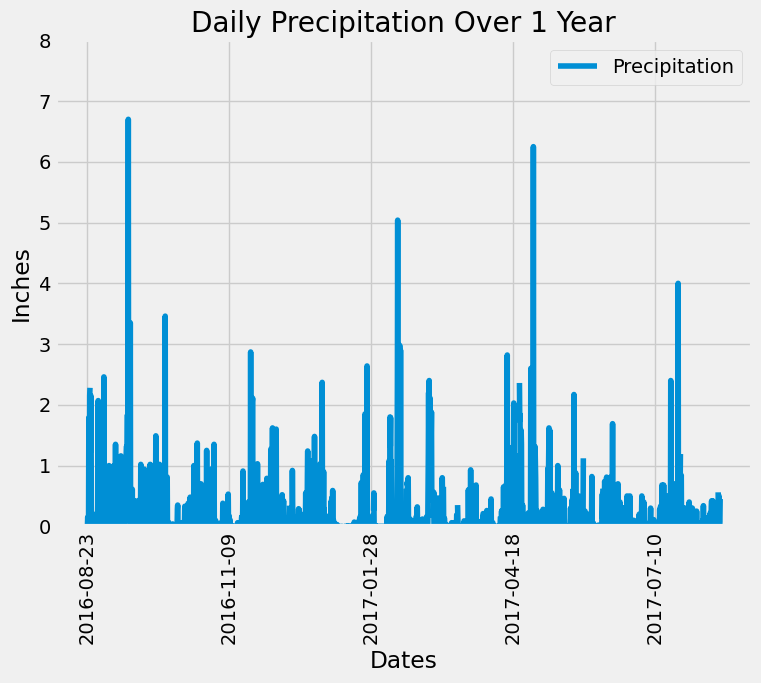

In [18]:
# Use Pandas Plotting with Matplotlib to plot the data

df_plot = df.plot(figsize=(8,6), ylim=(0,8), title = "Daily Precipitation Over 1 Year", rot=90)
df_plot.set_ylabel("Inches")
df_plot.set_xlabel("Dates")
plt.legend(loc='best')
plt.show()

In [19]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

Precipitation
count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000

# Exploratory Station Analysis

In [20]:
# Design a query to calculate the total number stations in the dataset
total_number_stations = session.query(Measurement.station).distinct().count()
print(total_number_stations)

9


In [21]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)

# List the stations and the counts in descending order.
stations_list = session.query(Measurement.station,func.count(Measurement.station)).group_by(Measurement.station).\
        order_by(func.count(Measurement.station).desc()).all()
stations_list

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [22]:
#Find most active station and save into pandas dataframe
most_active_station = stations_list[0][0]
print(most_active_station)

#most_active_station_df = pd.DataFrame(stations_list, columns=['Station', 'Counts'])
#(most_active_station_df)

USC00519281


In [23]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(Measurement.station, func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station==most_active_station).all()

[('USC00519281', 54.0, 85.0, 71.66378066378067)]

In [24]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
last_year = session.query(Measurement.date,Measurement.tobs).filter(Measurement.date >= "2016-08-23").\
filter(Measurement.station == 'USC00519281').order_by(Measurement.date).all()

In [25]:
station_tobs_df = pd.DataFrame(data=last_year).set_index('date')
station_tobs_df 

tobs
date            
2016-08-23  77.0
2016-08-24  77.0
2016-08-25  80.0
2016-08-26  80.0
2016-08-27  75.0
...          ...
2017-08-14  77.0
2017-08-15  77.0
2017-08-16  76.0
2017-08-17  76.0
2017-08-18  79.0

[352 rows x 1 columns]

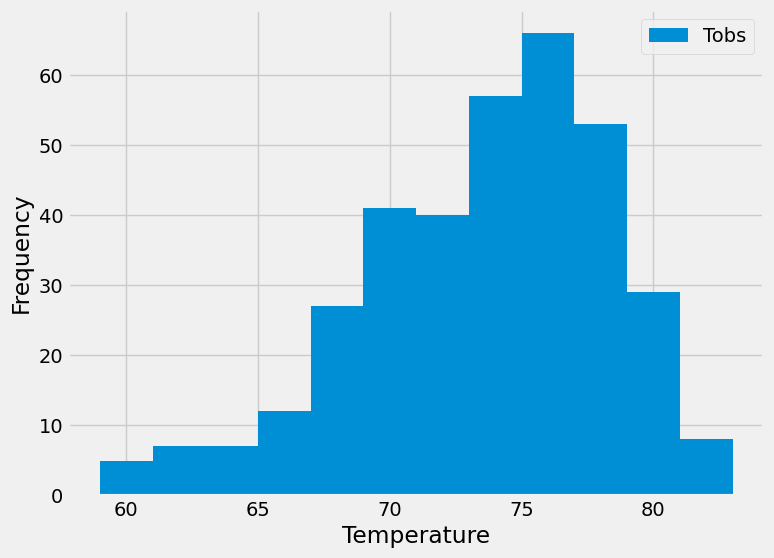

In [27]:
#Histogram plot 
plt.figure(figsize=(8,6))
plt.hist(station_tobs_df ['tobs'], bins = 12)
# plt.grid()
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.legend(["Tobs"])
plt.show()

# Close session

In [ ]:
# Close Session
session.close()